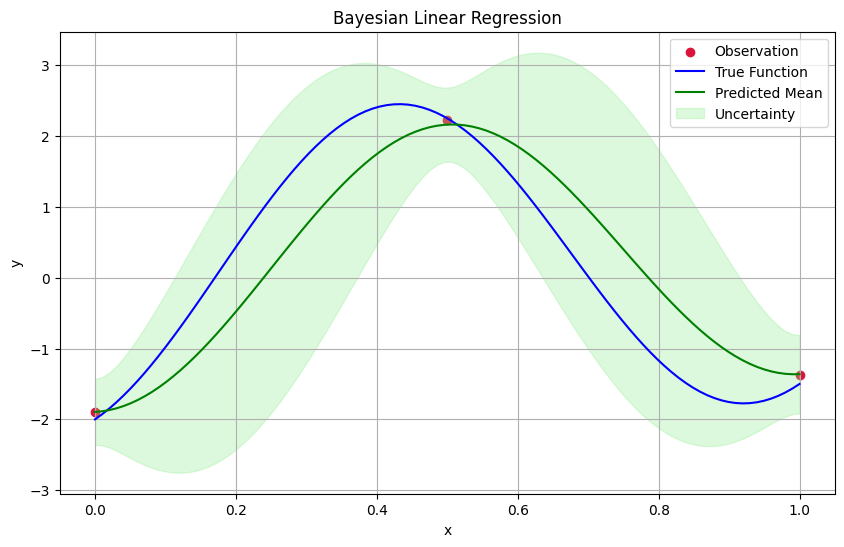

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# ベイズ線形回帰クラスの定義
class BayesianLinearRegression:
    def __init__(self, mu_prior, cov_prior, beta):
        self.mu_prior = mu_prior   # パラメータの事前平均
        self.cov_prior = cov_prior  # パラメータの事前共分散行列
        self.beta = beta            # ノイズの精度パラメータ

    def fit(self, phi, y):
        # データの数と特徴量の次元数を取得
        N, D = phi.shape

        # パラメータの事後分布の計算
        self.cov_posterior = np.linalg.inv(np.linalg.inv(self.cov_prior) + self.beta * phi.T @ phi)
        self.mu_posterior = self.cov_posterior @ (np.linalg.inv(self.cov_prior) @ self.mu_prior + self.beta * phi.T @ y)

    def predict(self, phi_pred):
        # 予測分布の計算
        pred_mean = phi_pred @ self.mu_posterior
        pred_cov = 1 / self.beta + np.sum(phi_pred @ self.cov_posterior * phi_pred, axis=1)
        return pred_mean, pred_cov

# サンプルデータの生成
np.random.seed(42)
x = np.linspace(0, 1, 50)
phi = np.column_stack([x, np.sin(2 * np.pi * x), np.cos(2 * np.pi * x)])  # 例として、3つの特徴量を使用
true_params = np.array([0.5, 1.0, -2.0])
y_true = phi @ true_params
noise = np.random.randn(len(x)) * 0.2  # ノイズの生成
y = y_true + noise

# パラメータの事前分布の設定
mu_prior = np.zeros(phi.shape[1])     # パラメータの事前平均をゼロベクトルで初期化
cov_prior = np.identity(phi.shape[1]) # パラメータの事前共分散行列を単位行列で初期化
sigma = 0.2                           # ノイズの標準偏差
beta = 1.0 / (sigma ** 2)             # ノイズの精度パラメータを計算

# ベイズ線形回帰モデルの初期化と学習
model = BayesianLinearRegression(mu_prior, cov_prior, beta)
model.fit(phi, y)

# 新しい入力データに対する予測分布の計算
x_pred = np.linspace(0, 1, 100)
phi_pred = np.column_stack([x_pred, np.sin(2 * np.pi * x_pred), np.cos(2 * np.pi * x_pred)])  # 予測に使用する特徴量行列
pred_mean, pred_cov = model.predict(phi_pred)
pred_std = np.sqrt(pred_cov)

# プロット
plt.figure(figsize=(10, 6))
plt.scatter(x, y, c='crimson', marker='o', label='Observation')
plt.plot(x_pred, phi_pred @ true_params, label='True Function', color='blue')
plt.plot(x_pred, pred_mean, label='Predicted Mean', color='green')
plt.fill_between(x_pred, pred_mean - 2 * pred_std, pred_mean + 2 * pred_std, color='lightgreen', alpha=0.3, label='Uncertainty')
plt.title('Bayesian Linear Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

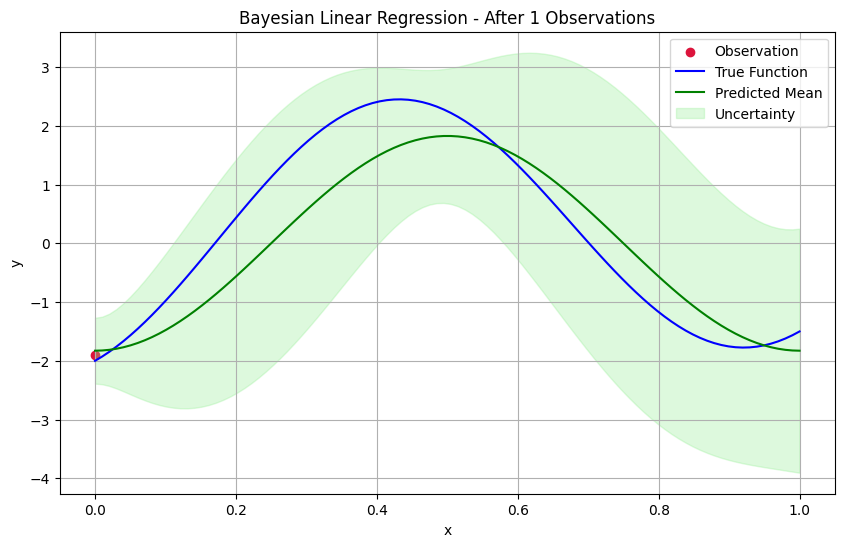

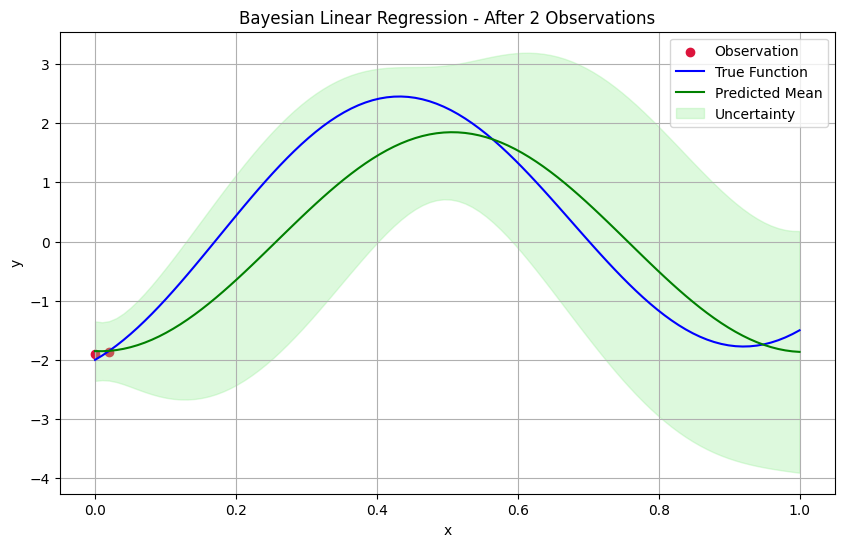

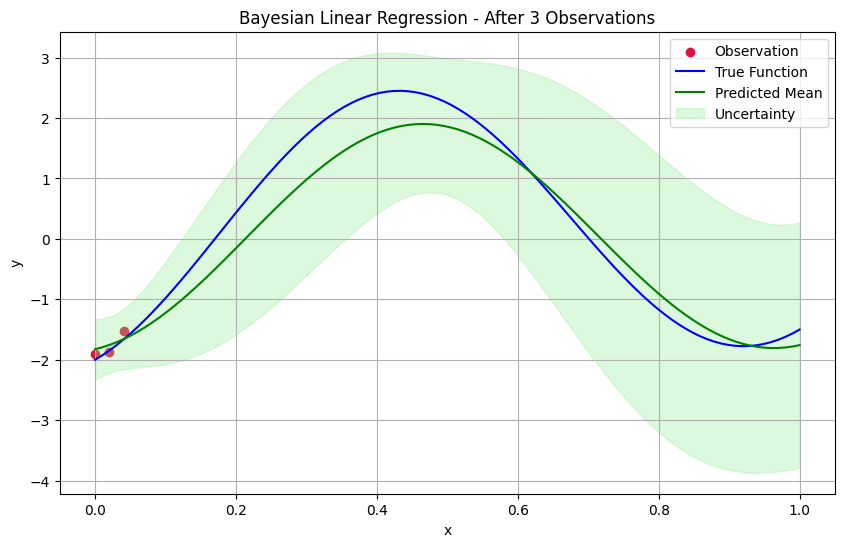

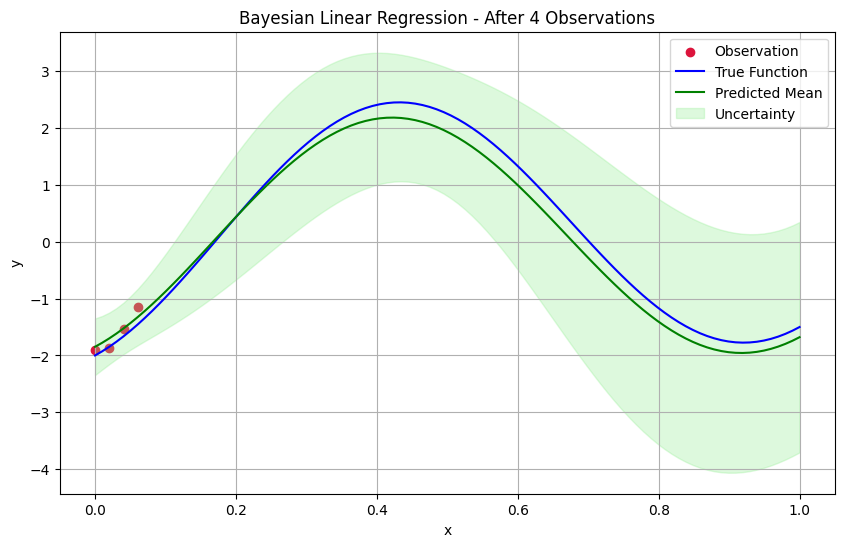

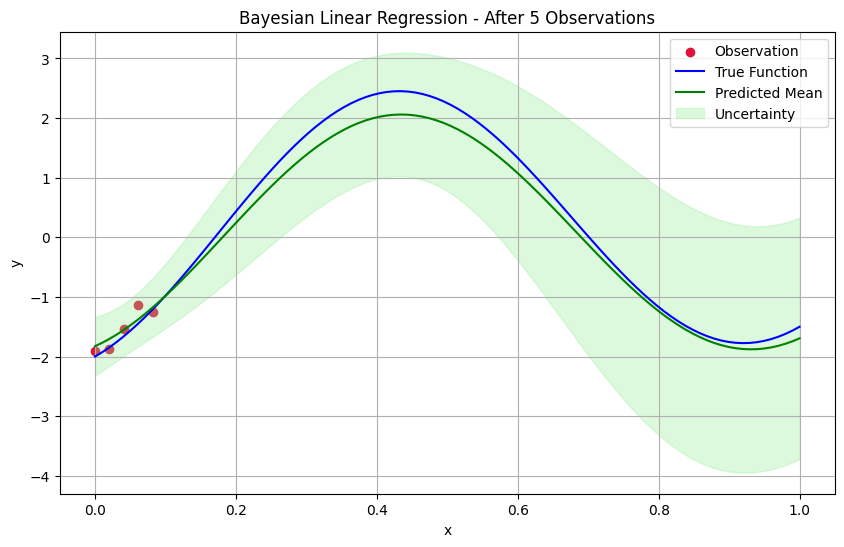

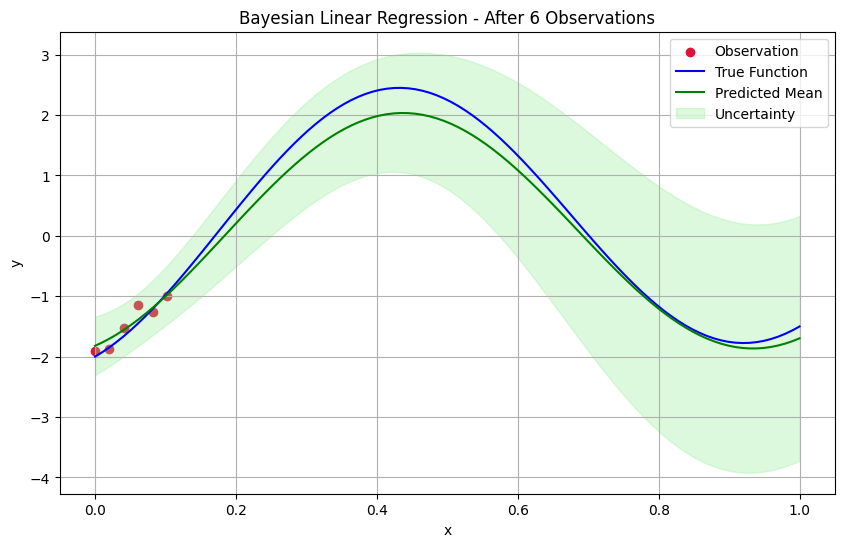

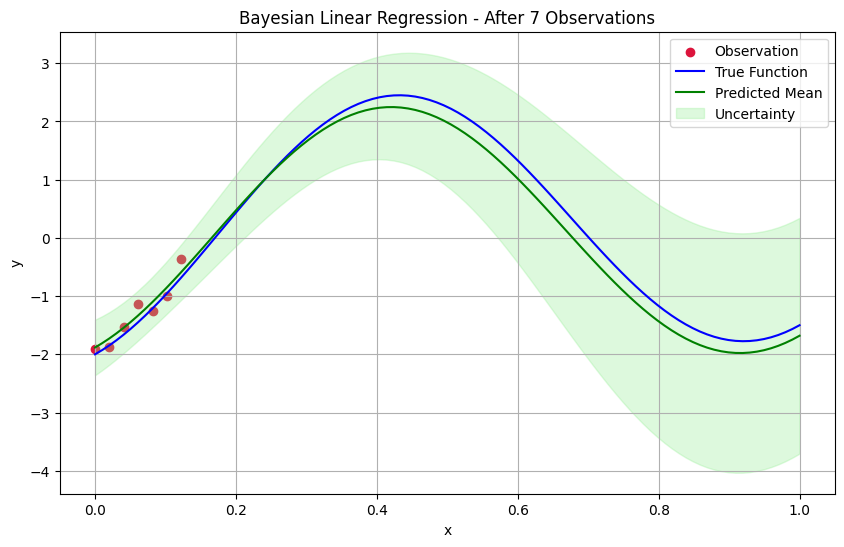

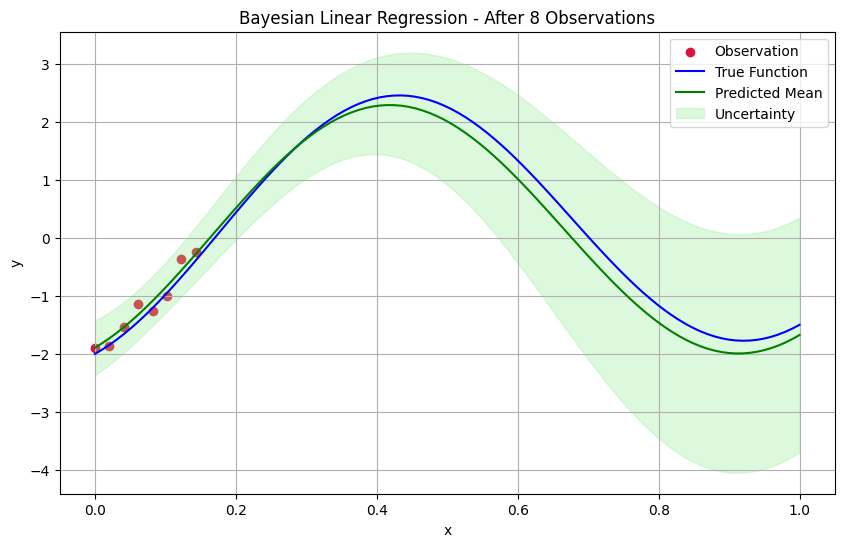

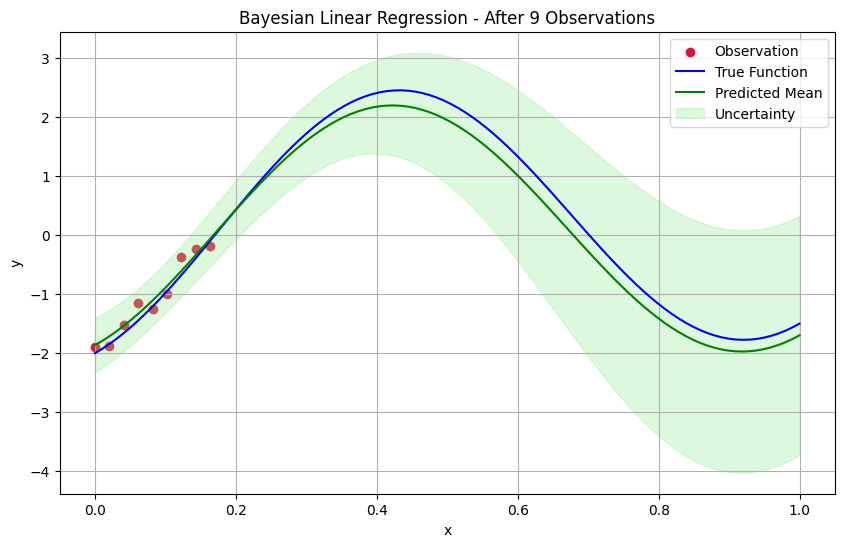

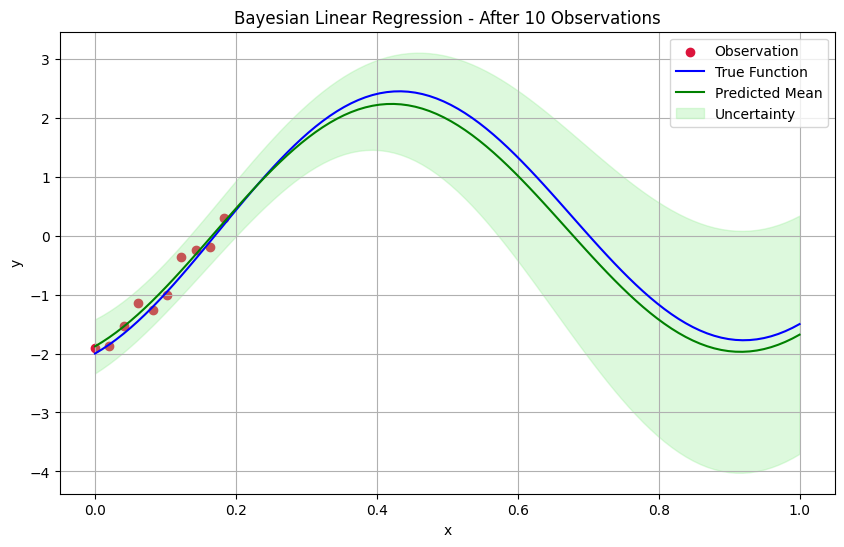

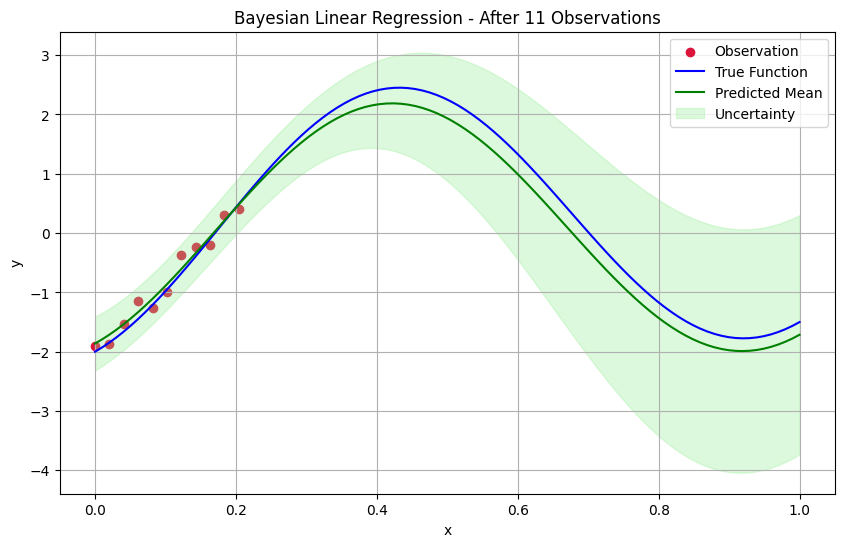

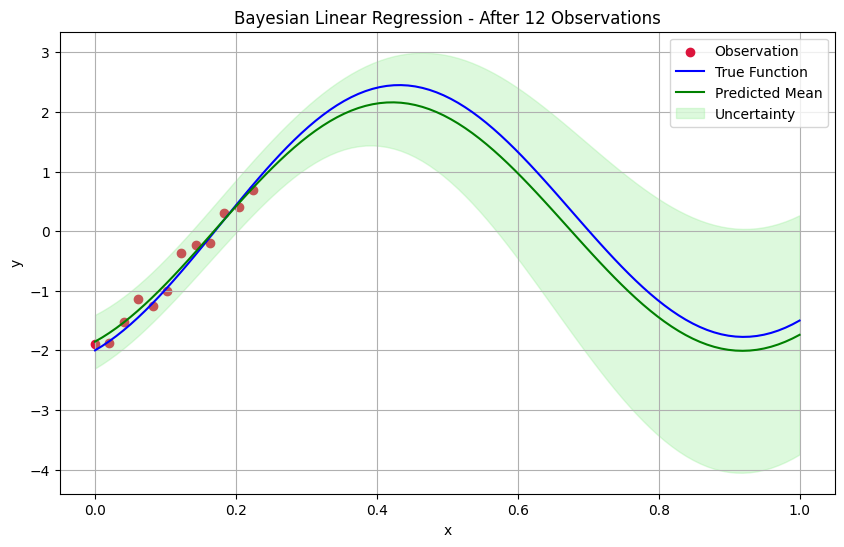

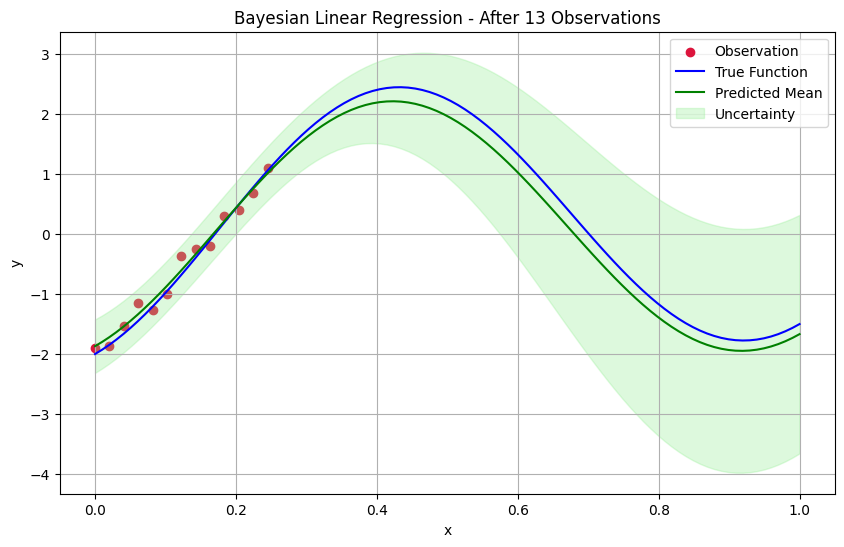

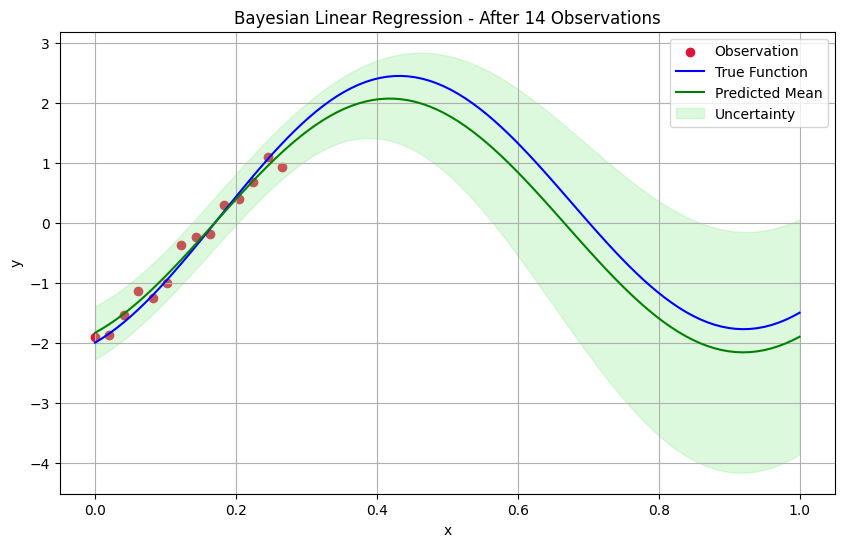

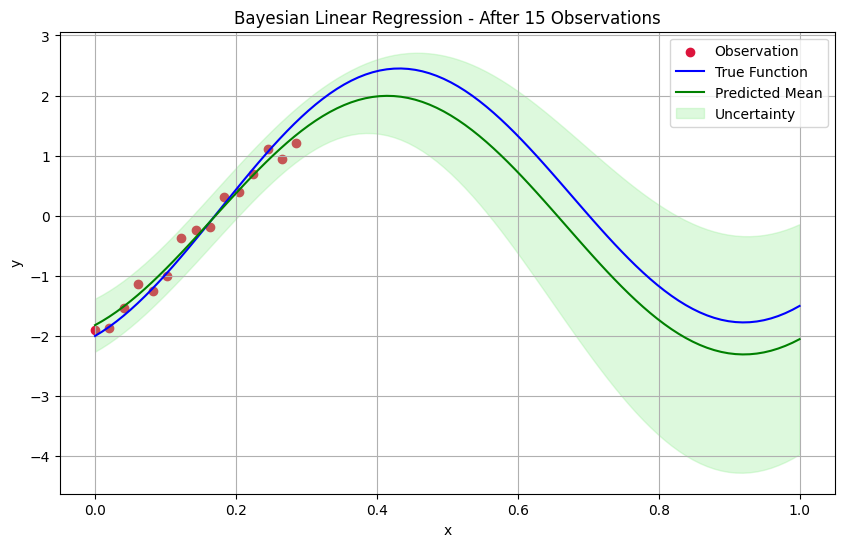

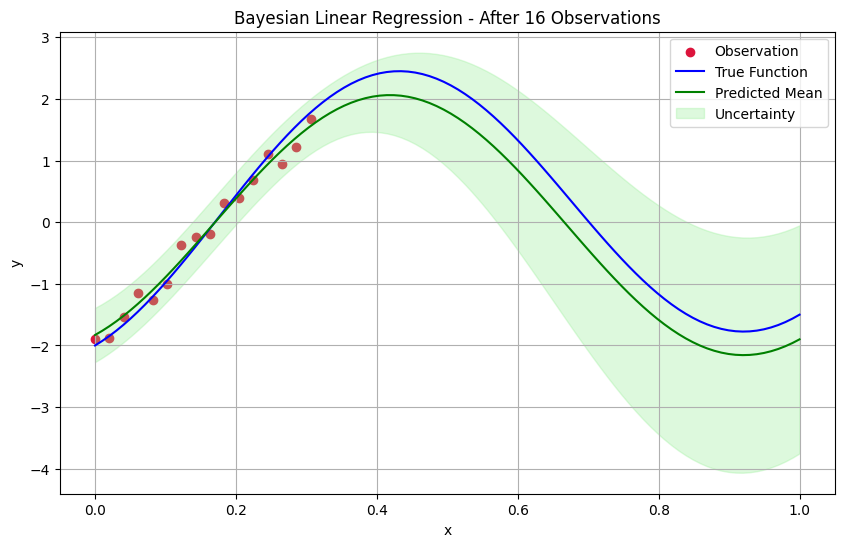

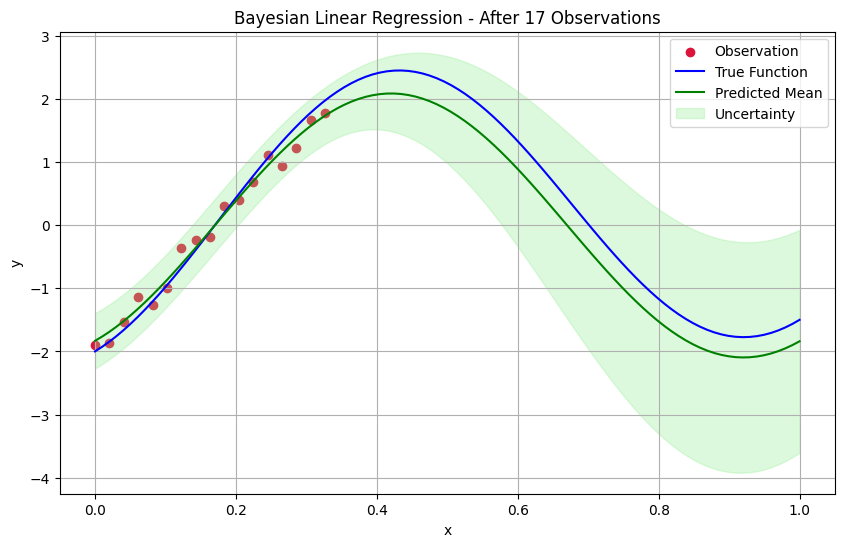

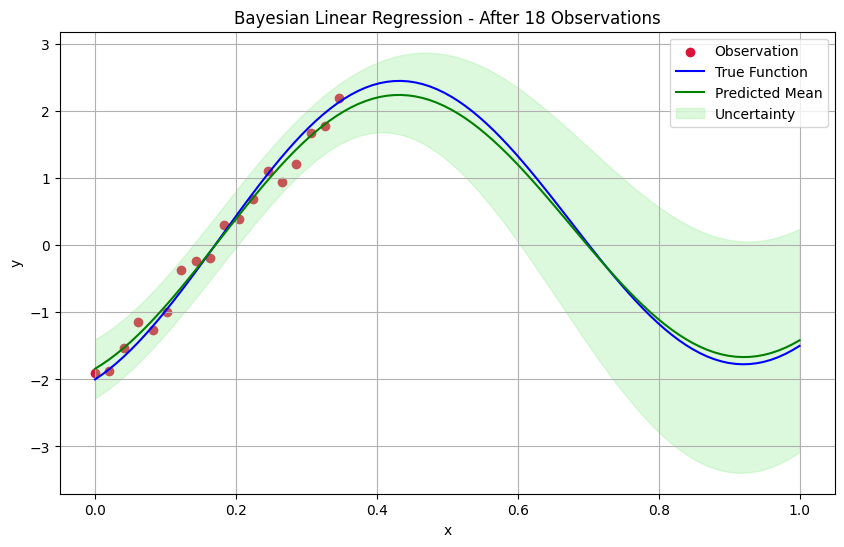

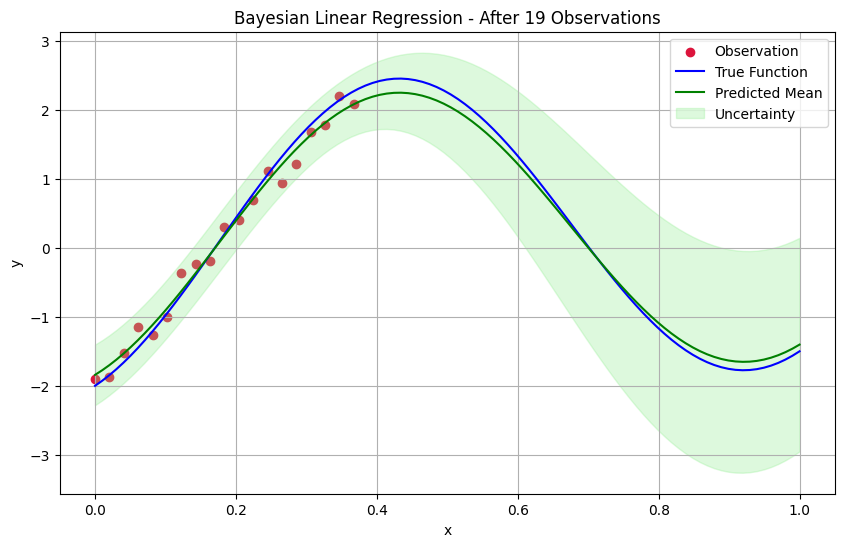

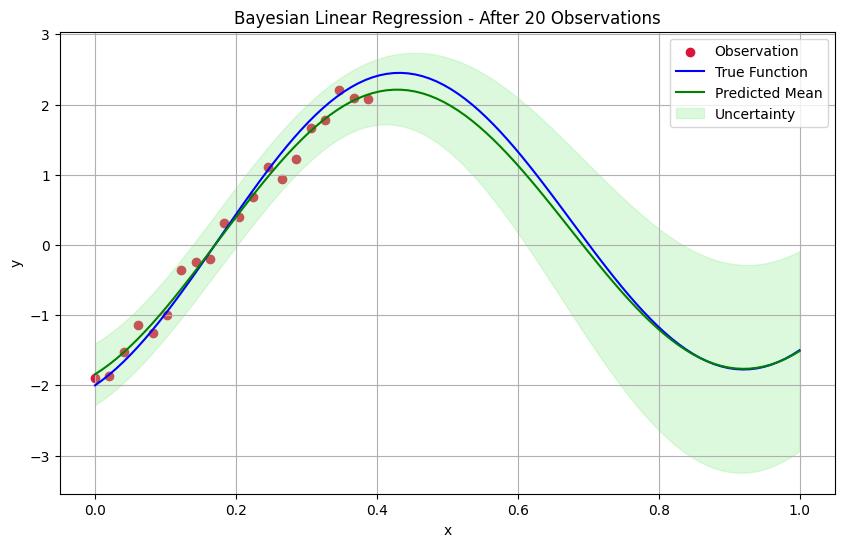

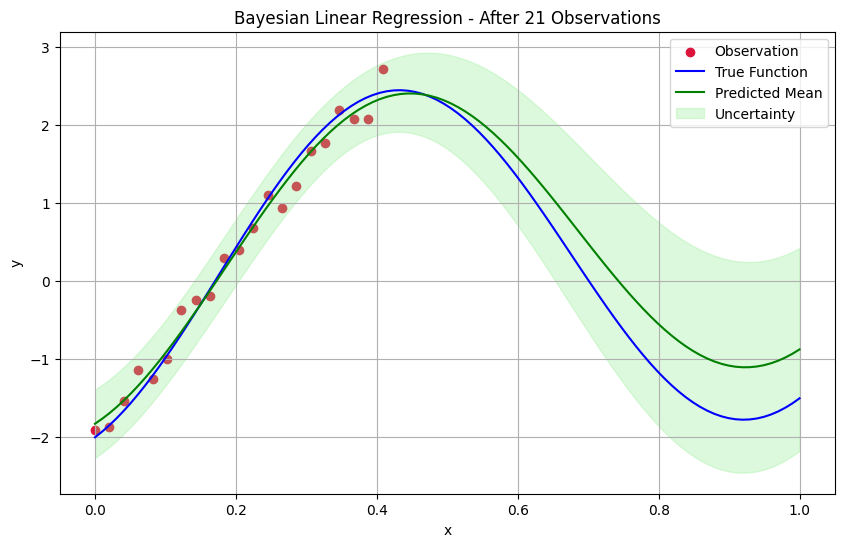

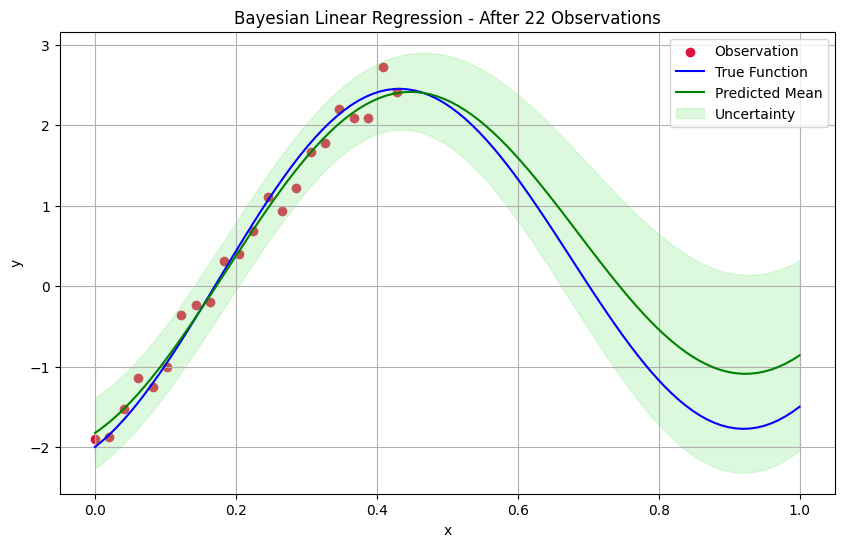

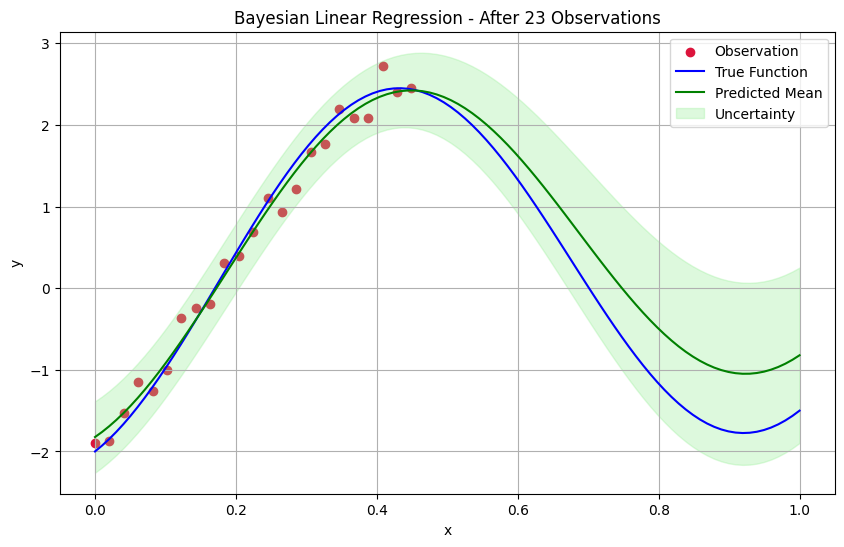

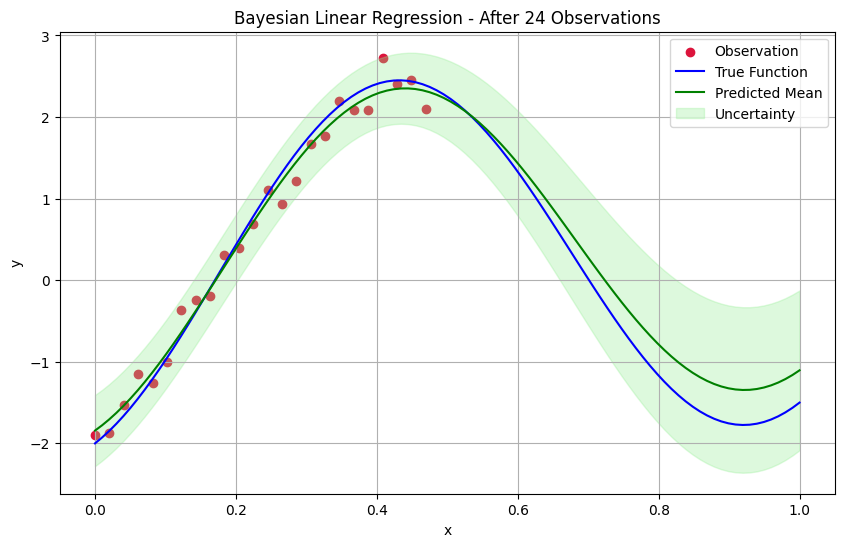

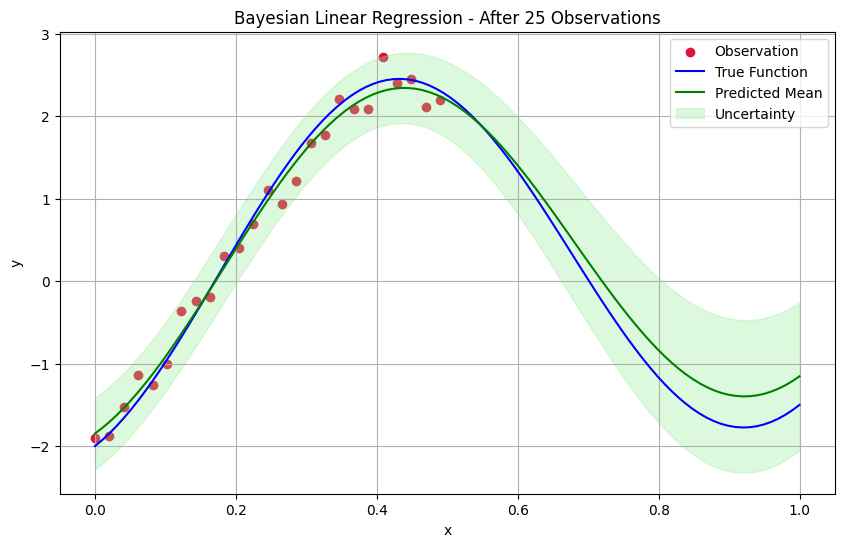

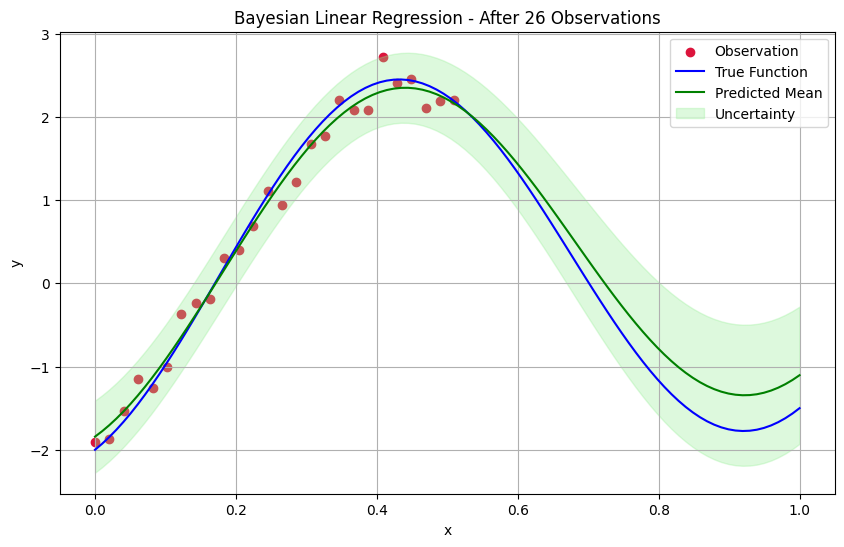

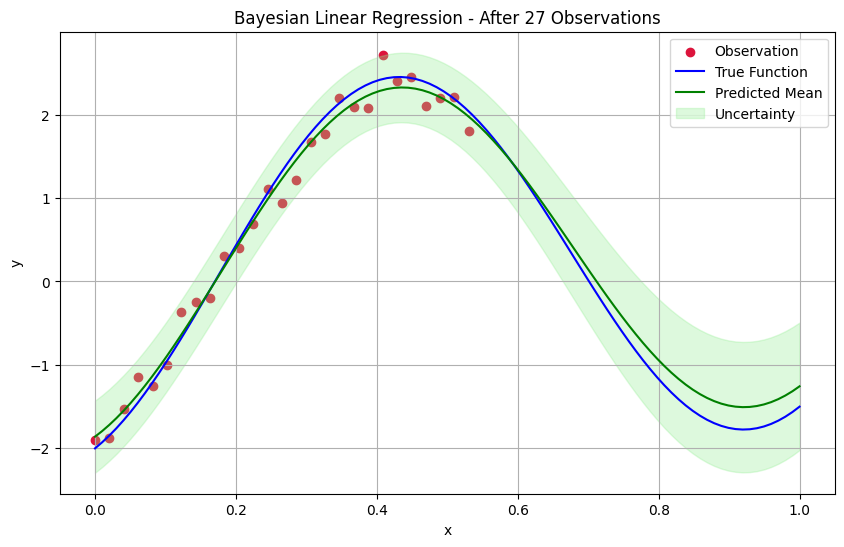

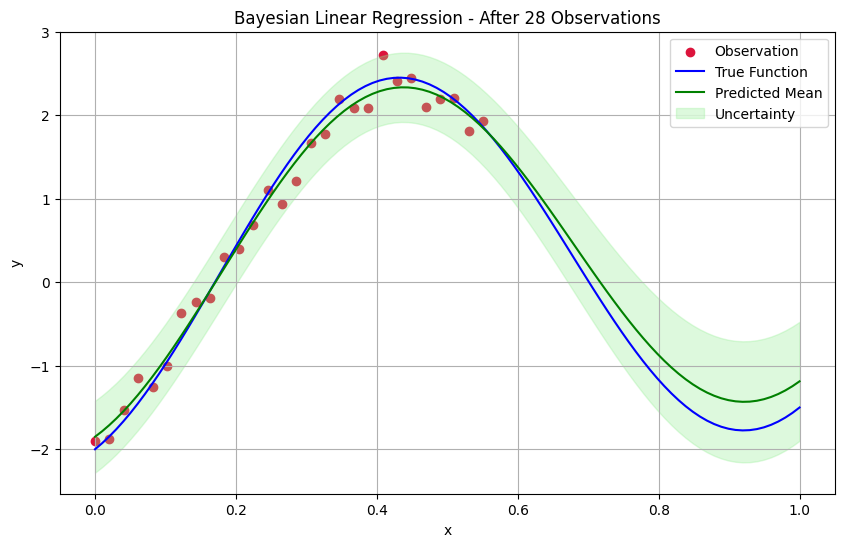

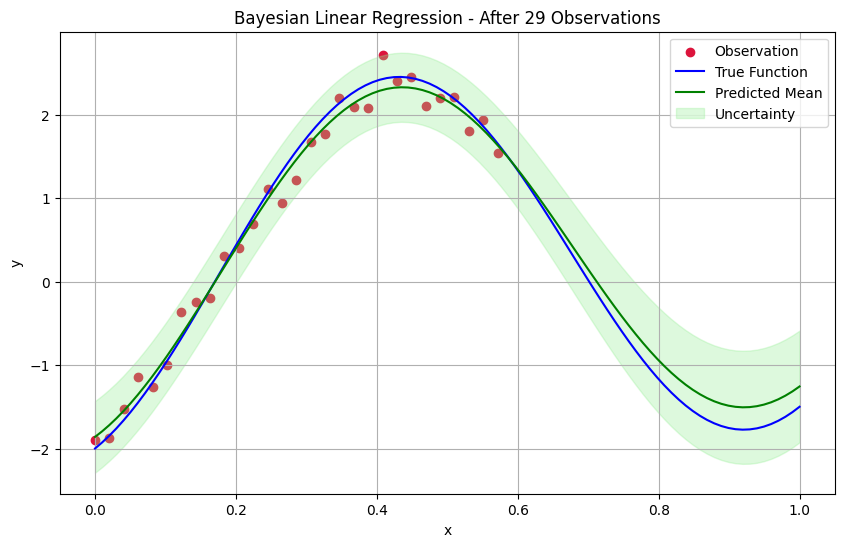

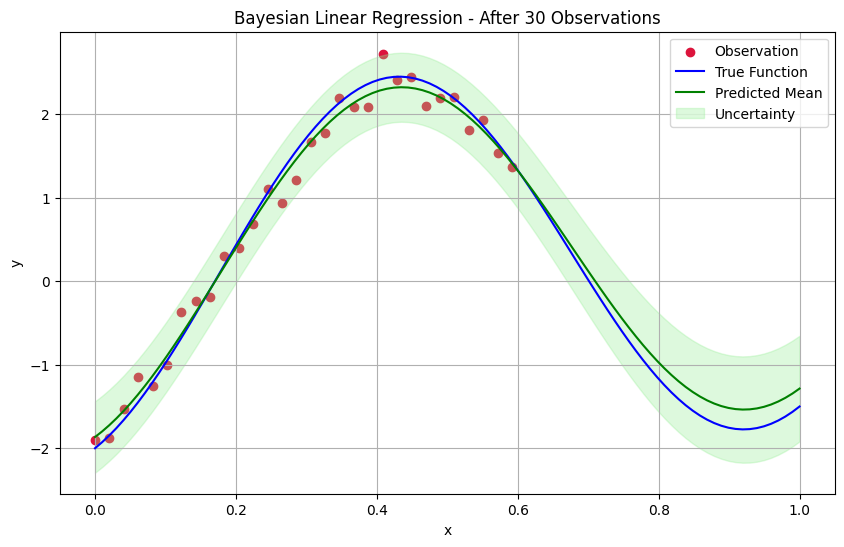

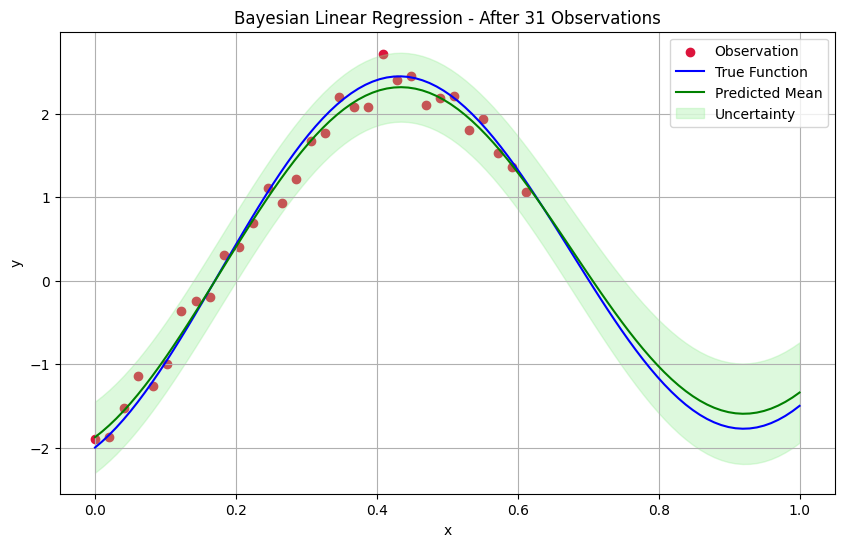

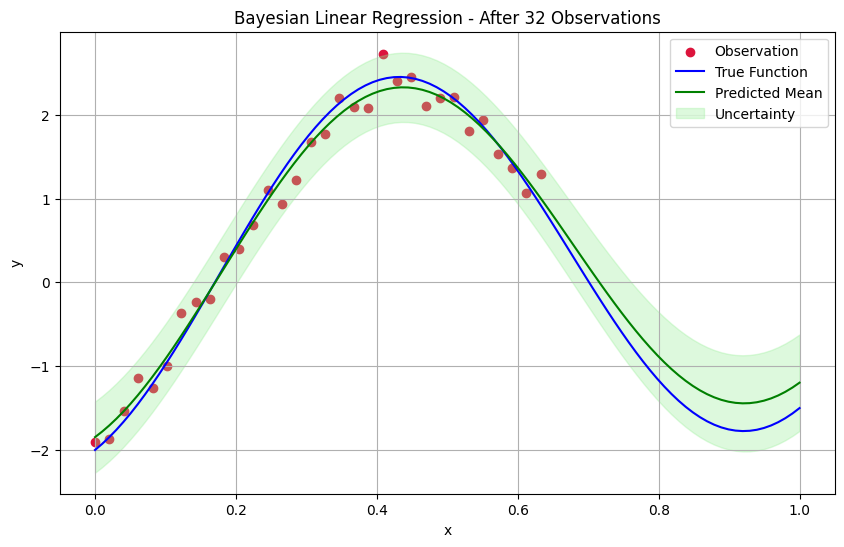

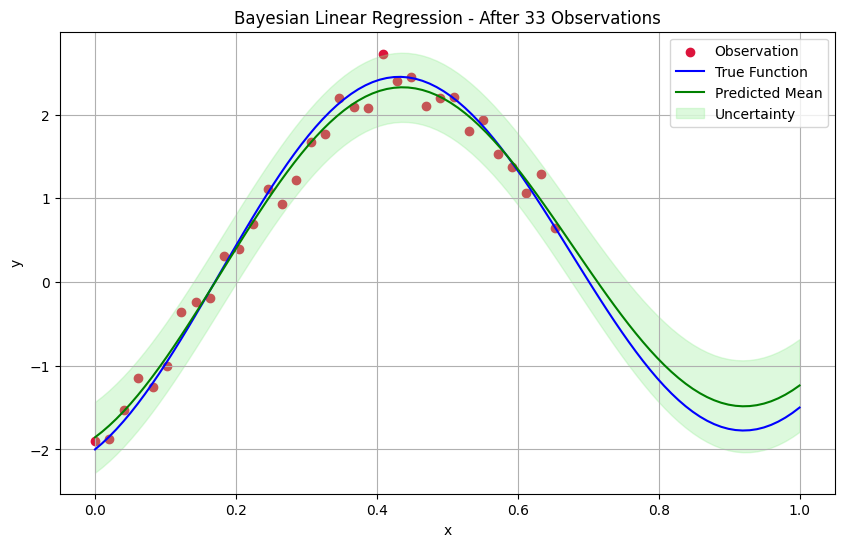

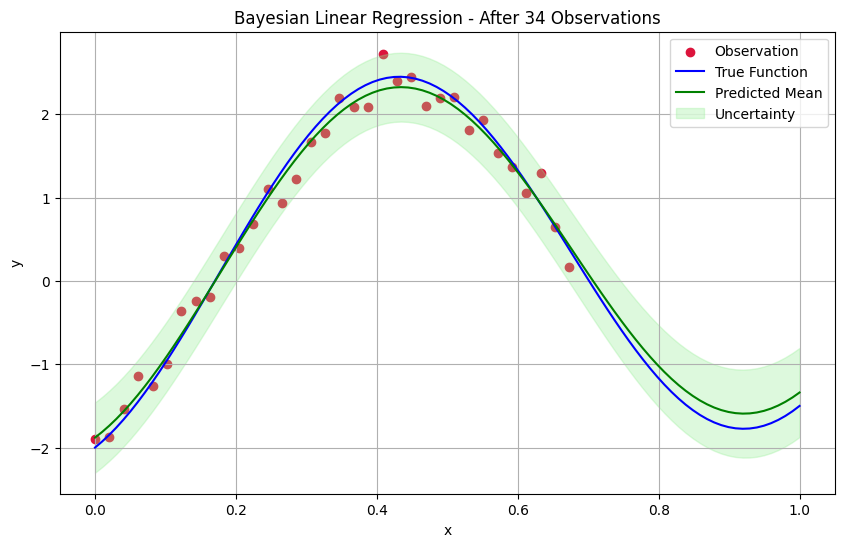

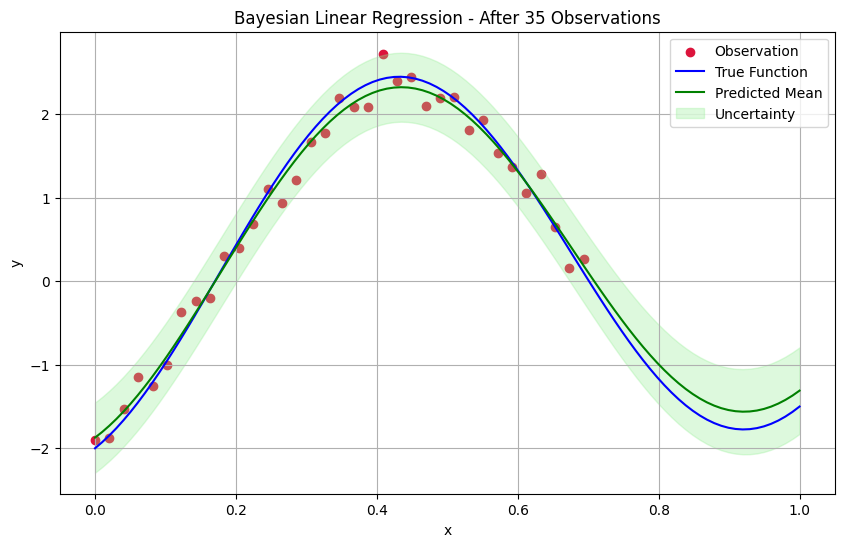

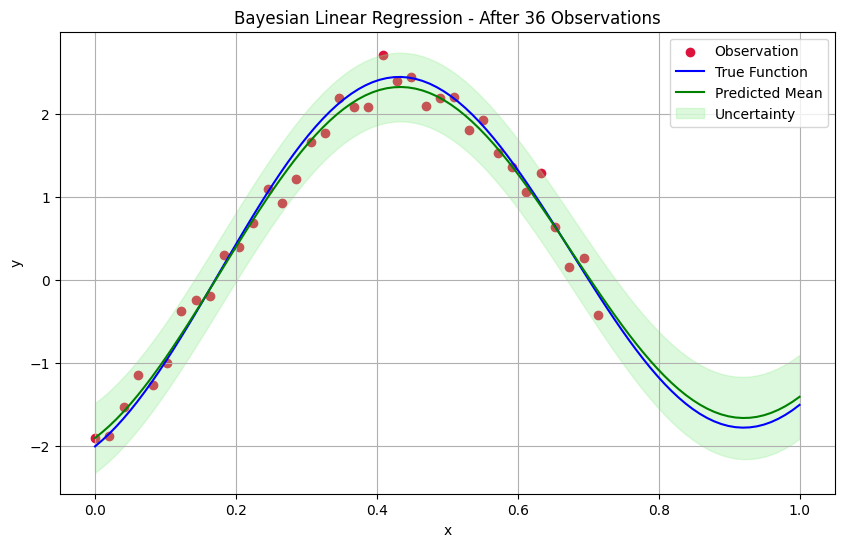

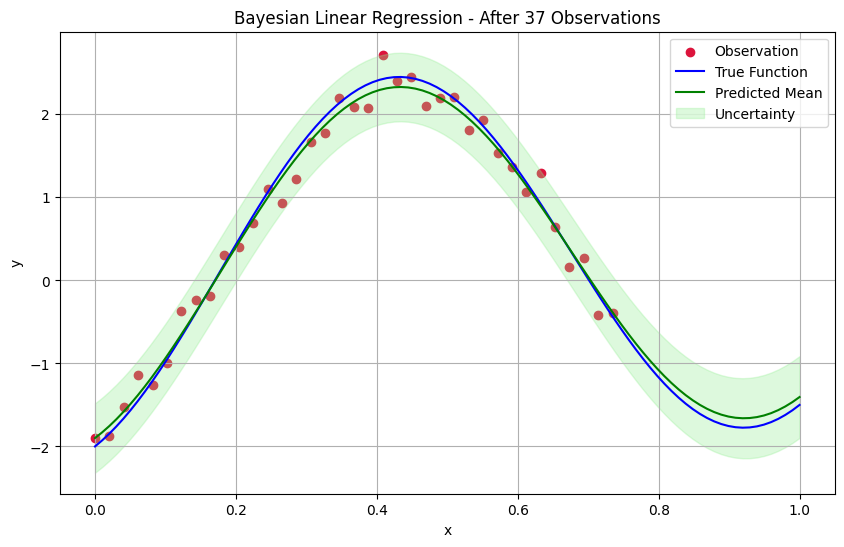

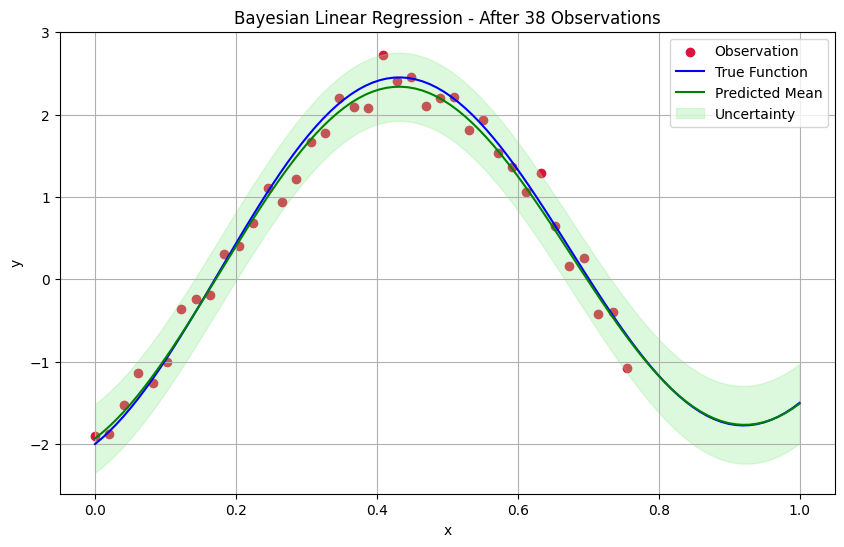

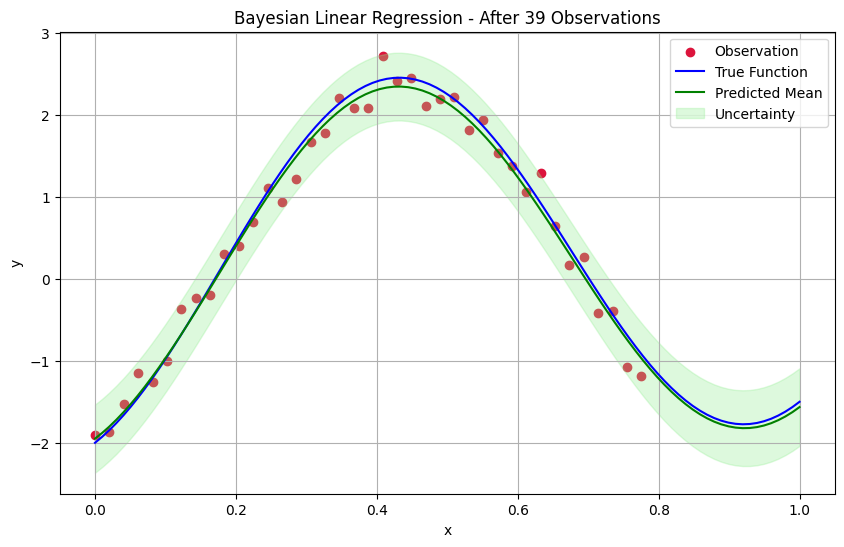

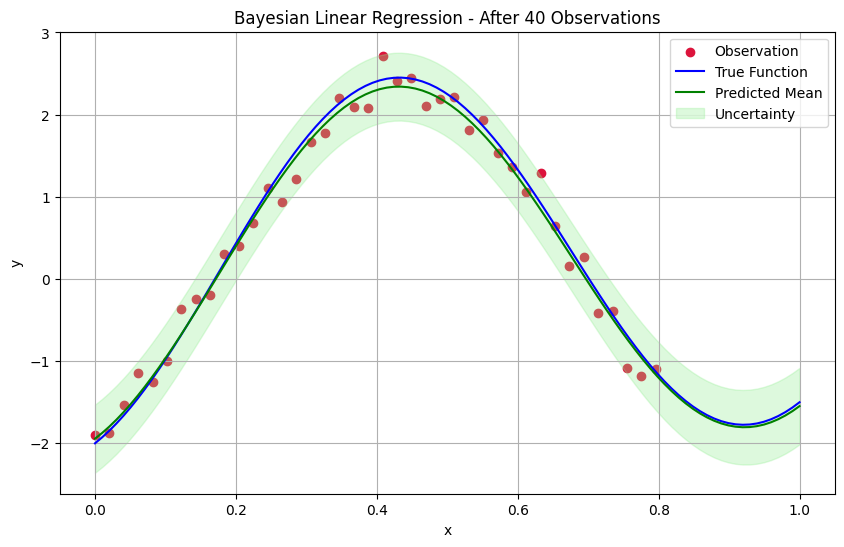

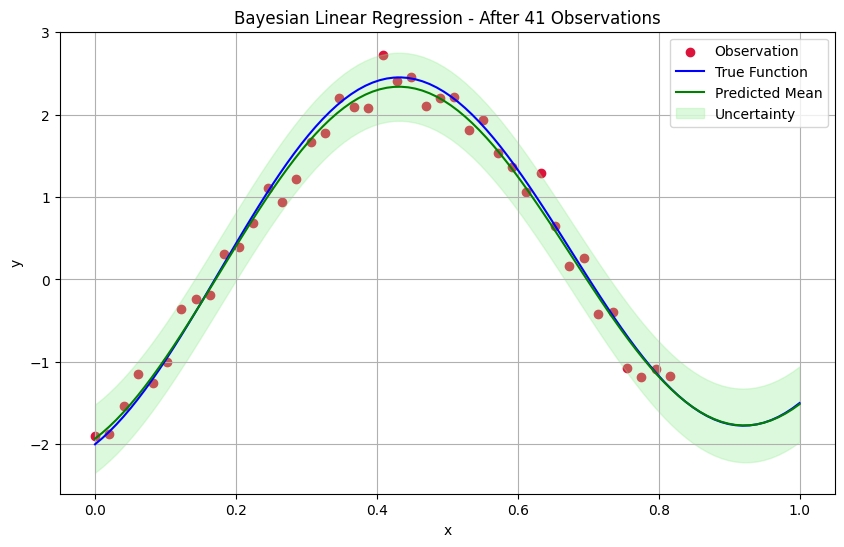

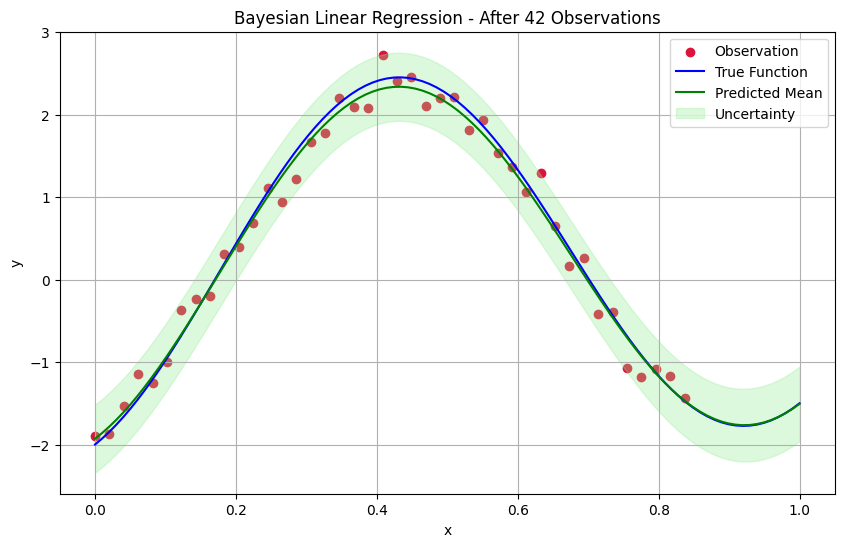

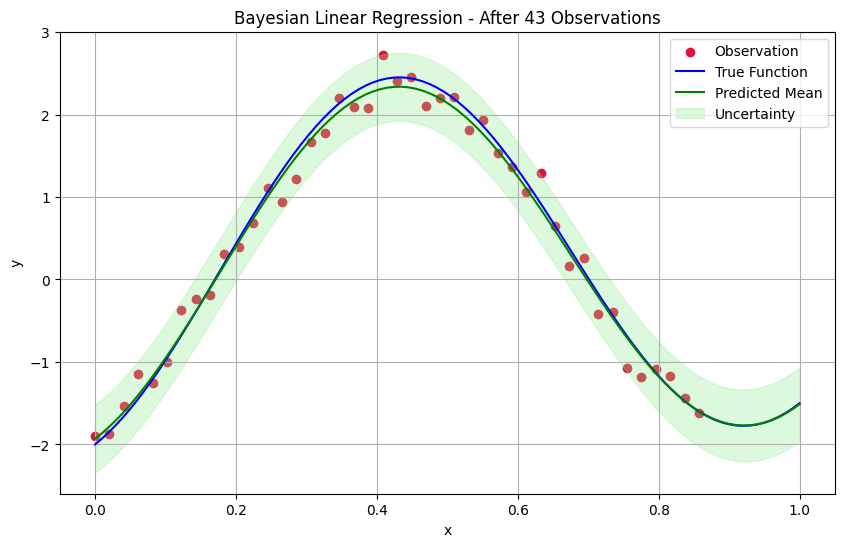

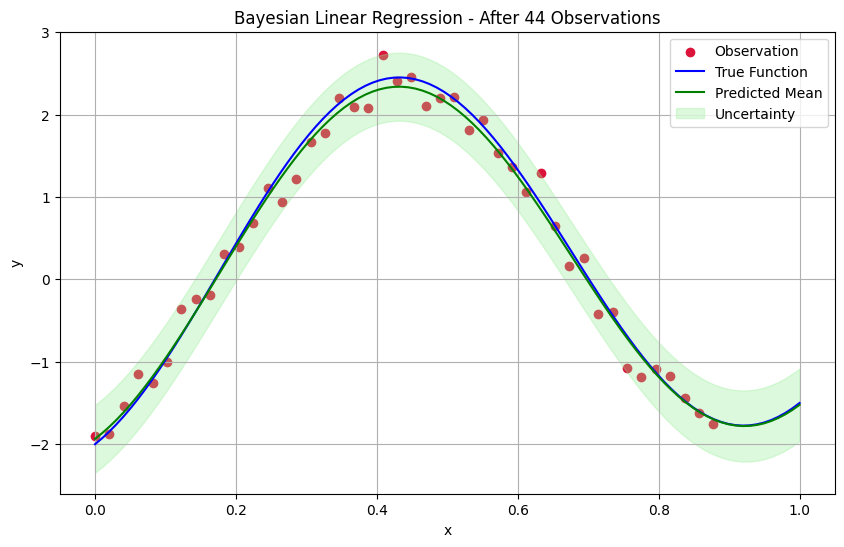

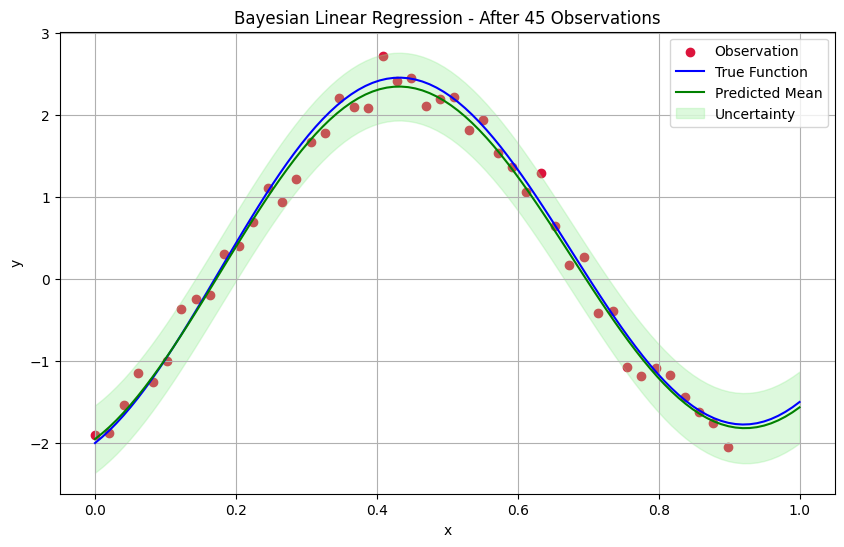

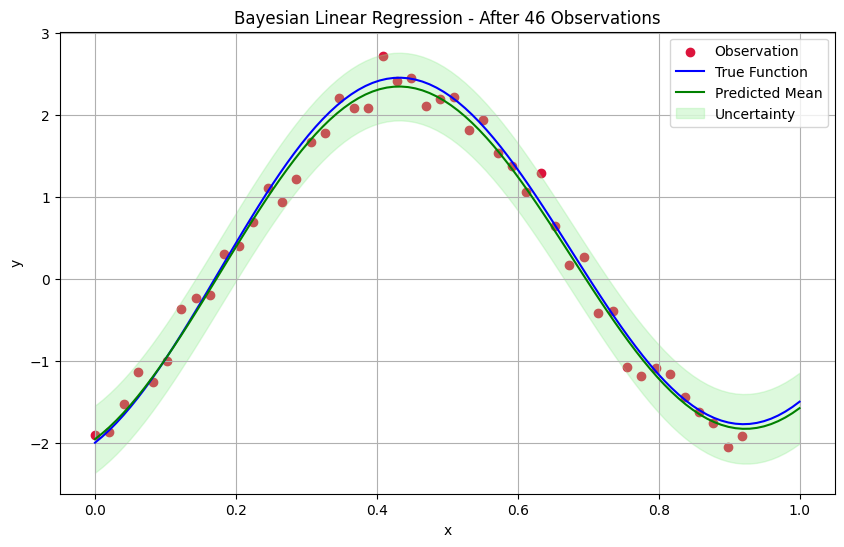

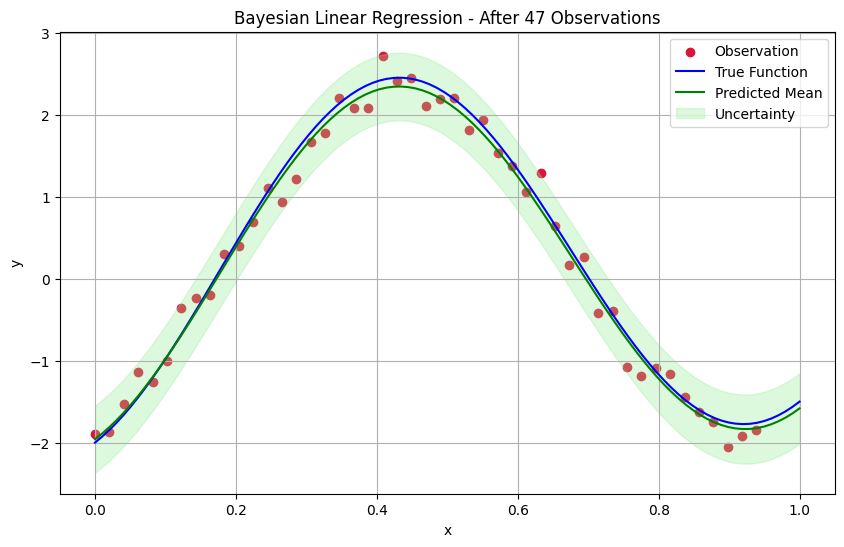

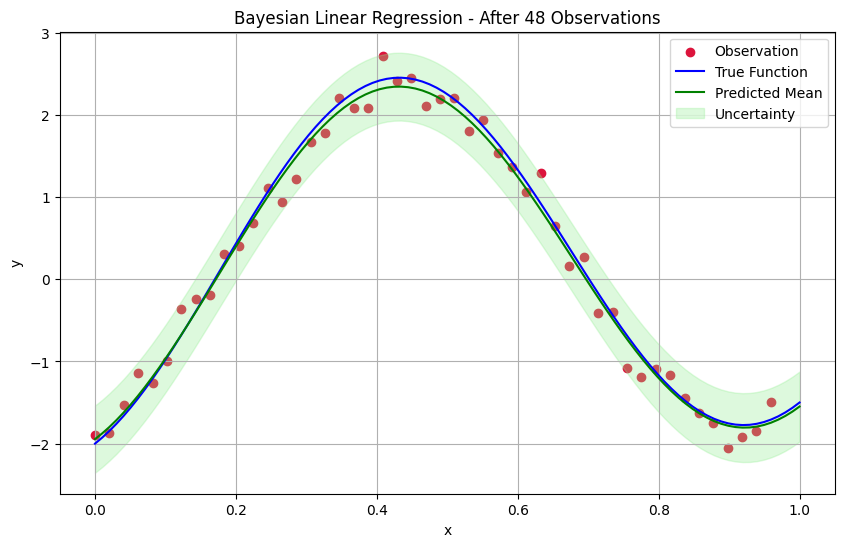

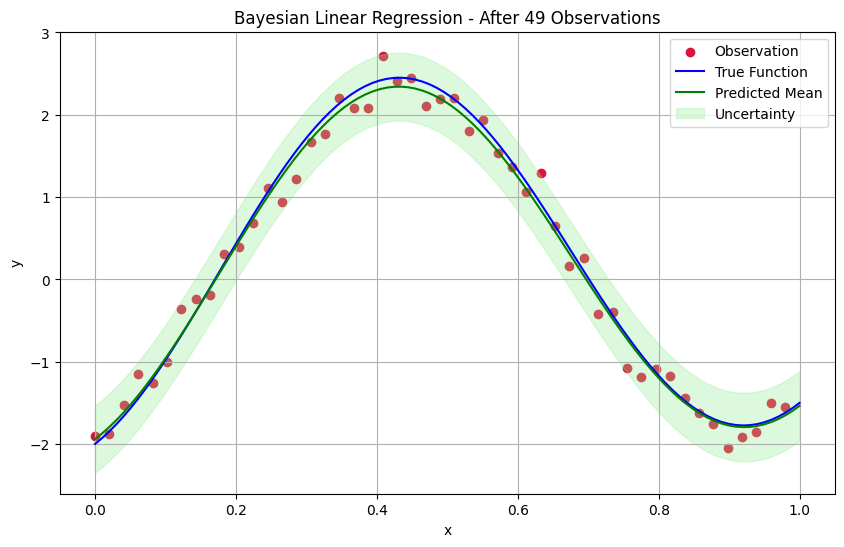

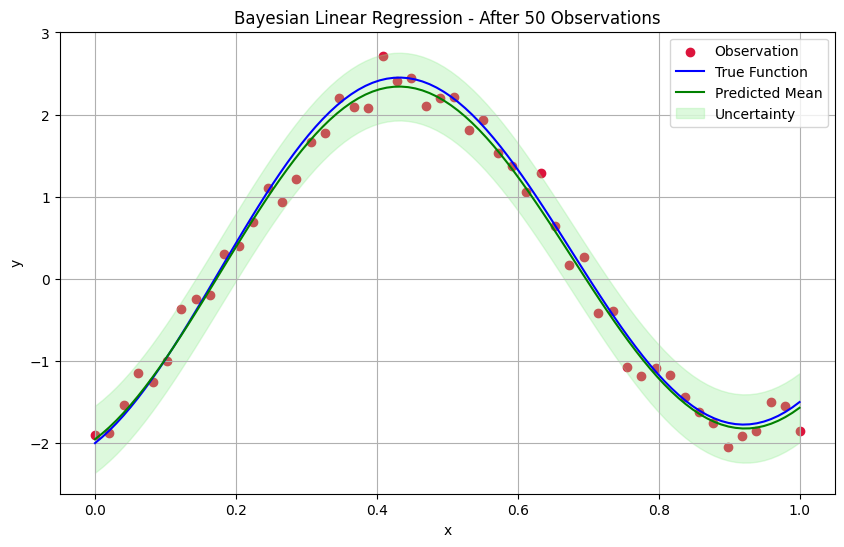

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# ベイズ線形回帰クラスの定義
class BayesianLinearRegression:
    def __init__(self, mu_prior, cov_prior, beta):
        self.mu_prior = mu_prior   # パラメータの事前平均
        self.cov_prior = cov_prior  # パラメータの事前共分散行列
        self.beta = beta            # ノイズの精度パラメータ

    def update(self, phi_new, y_new):
        # 新しいデータを用いて事後分布を更新
        self.cov_posterior = np.linalg.inv(np.linalg.inv(self.cov_prior) + self.beta * phi_new.T @ phi_new)
        self.mu_posterior = self.cov_posterior @ (np.linalg.inv(self.cov_prior) @ self.mu_prior + self.beta * phi_new.T @ y_new)

    def predict(self, phi_pred):
        # 予測分布の計算
        pred_mean = phi_pred @ self.mu_posterior
        pred_cov = 1 / self.beta + np.sum(phi_pred @ self.cov_posterior * phi_pred, axis=1)
        return pred_mean, pred_cov
    
    def update_prior(self):
        #priorを一回前に予測された事後確率に更新
        self.cov_prior = self.cov_posterior
        self.mu_prior = self.mu_posterior

# サンプルデータの生成
np.random.seed(42)
x = np.linspace(0, 1, 50)
phi = np.column_stack([x, np.sin(2 * np.pi * x), np.cos(2 * np.pi * x)])  # 例として、3つの特徴量を使用
true_params = np.array([0.5, 1.0, -2.0])
y_true = phi @ true_params
noise = np.random.randn(len(x)) * 0.2  # ノイズの生成
y = y_true + noise

# パラメータの事前分布の設定
mu_prior = np.zeros(phi.shape[1])     # パラメータの事前平均をゼロベクトルで初期化
cov_prior = np.identity(phi.shape[1]) # パラメータの事前共分散行列を単位行列で初期化
sigma = 0.2                           # ノイズの標準偏差
beta = 1.0 / (sigma ** 2)             # ノイズの精度パラメータを計算

# ベイズ線形回帰モデルの初期化
model = BayesianLinearRegression(mu_prior, cov_prior, beta)

# データを1つずつ追加しながらモデルを逐次的に更新
for i in range(len(x)):
    if i != 0:
        model.update_prior()

    phi_new = phi[i:i+1, :]  # 新しいデータ点の特徴量
    y_new = y[i:i+1]         # 新しいデータ点のターゲット値

    # モデルの更新
    model.update(phi_new, y_new)

    # 予測のための入力データと予測分布の計算
    x_pred = np.linspace(0, 1, 100)
    phi_pred = np.column_stack([x_pred, np.sin(2 * np.pi * x_pred), np.cos(2 * np.pi * x_pred)])  # 予測に使用する特徴量行列
    pred_mean, pred_cov = model.predict(phi_pred)
    pred_std = np.sqrt(pred_cov)

    # プロット
    plt.figure(figsize=(10, 6))
    plt.scatter(x[:i+1], y[:i+1], c='crimson', marker='o', label='Observation')
    plt.plot(x_pred, phi_pred @ true_params, label='True Function', color='blue')
    plt.plot(x_pred, pred_mean, label='Predicted Mean', color='green')
    plt.fill_between(x_pred, pred_mean - 2 * pred_std, pred_mean + 2 * pred_std, color='lightgreen', alpha=0.3, label='Uncertainty')
    plt.title(f'Bayesian Linear Regression - After {i+1} Observations')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()


In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split

def x_to_phi(x, typ='linear', degree=3):
    if len(x.shape) == 1:
        x = x.reshape(-1, 1)
    return np.concatenate([np.ones(x.shape[0]).reshape(-1, 1), x], axis=1)


df = pd.read_csv("advertising.csv")
x = df[['TV', 'Radio']].values
y = df['Sales'].values

phi = x_to_phi(x)
x_train, x_test, phi_train, phi_test, y_train, y_test = \
    train_test_split(x, phi, y, train_size=0.05, random_state=0)